In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys
import pandas as pd
import pickle
import re

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

from mergeResults import *
sns.set(style="whitegrid")
# sns.set_context("paper")

Running time for shortest path calculation for graph with nodes/edges: 105883 100685; 200 customers, ~the same amount of facilities
1. single-to-all : 2174.89371681
2. all-to-all: 7218.86152506
3. source-to-all: 3176.82115602

In [98]:
typedir = "real"

# expnames = [("fcla_l0", "UF WMA", sns.xkcd_rgb["dusty purple"],'o'),
#             ("fcla_multi", "WMA", sns.xkcd_rgb["pale red"],'s'),
#             ("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'v'),
#              ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^')]#,
# #             ("gurobi_eq", "UF Gurobi", sns.xkcd_rgb["denim blue"],'v')]


expnames = [("fcla_l0_uni", "UF WMA", sns.xkcd_rgb["dusty purple"],'s'),
            ("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'v'),
           ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^'),
            ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'o')]

def plot_all(dirname, expname, log=True, sortby="vcount",xlabel="Network size [Nodes]"):
    
    #load gurobi distance
#     f = open(os.path.join(data_path,typedir,dirname,'distMatrFull.txt'), "r")
#     distmatxtime = float(f.read())
#     f.close()
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(4, 5), dpi=300)
#     fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 4), dpi=300)
    
    for expname in expnames:
        results = load_results(os.path.join(data_path, typedir, dirname, "solutions", expname[0]), 
                               os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
        results = results[results['objective'].notnull()]
        
#         if (expname[0] == 'fcla_l0'):
#             results.set_value(results['number of facilities'] < 30, 'number of facilities', 30)

        results = results[results['number of facilities'] >= 30] #for cph_all

#         results = results[results['number of facilities'] <= 180]
        
        runtime_results = results['runtime']
        if (re.match(r'gurobi',expname[0])):
            runtime_results += results['sptime']
#             runtime_results += distmatxtime
        
        ax1.plot(results[sortby], runtime_results, expname[2], label=expname[1], marker=expname[3])
        ax2.plot(results[sortby], results['objective'], expname[2], label=expname[1], marker=expname[3])
        
    # setting first axis
    ax1.set_yscale("log")
#     if (log):
#         ax1.set_xscale("log", nonposx='clip', basex=10)
#         ax2.set_xscale("log", nonposx='clip', basex=10)
        
    ax1.set_ylabel("Runtime [Sec]")
    ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=2, mode="expand", borderaxespad=0., fontsize='x-small',frameon=False)
#     ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#               ncol=6, mode="expand", borderaxespad=0., fontsize='x-small',frameon=True)
    plt.setp(ax1.get_xticklabels(), visible=False)
    # setting second axis
#     ax2.ticklabel_format(style='sci', axis='y')
#     ax2.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Objective")
    ax2.yaxis.get_major_formatter().set_powerlimits((0, 0))
    ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax2.ticklabel_format(style='sci', axis='н', scilimits=(0,0))
        
#     ax2.set_yscale("log")
    
#     ax1.set_xlim(25, 80)
#     ax2.set_xlim(25, 80)
#     ax2.set_xlim(50, 190)
#     ax1.set_ylim(1, 1.8*10**2)

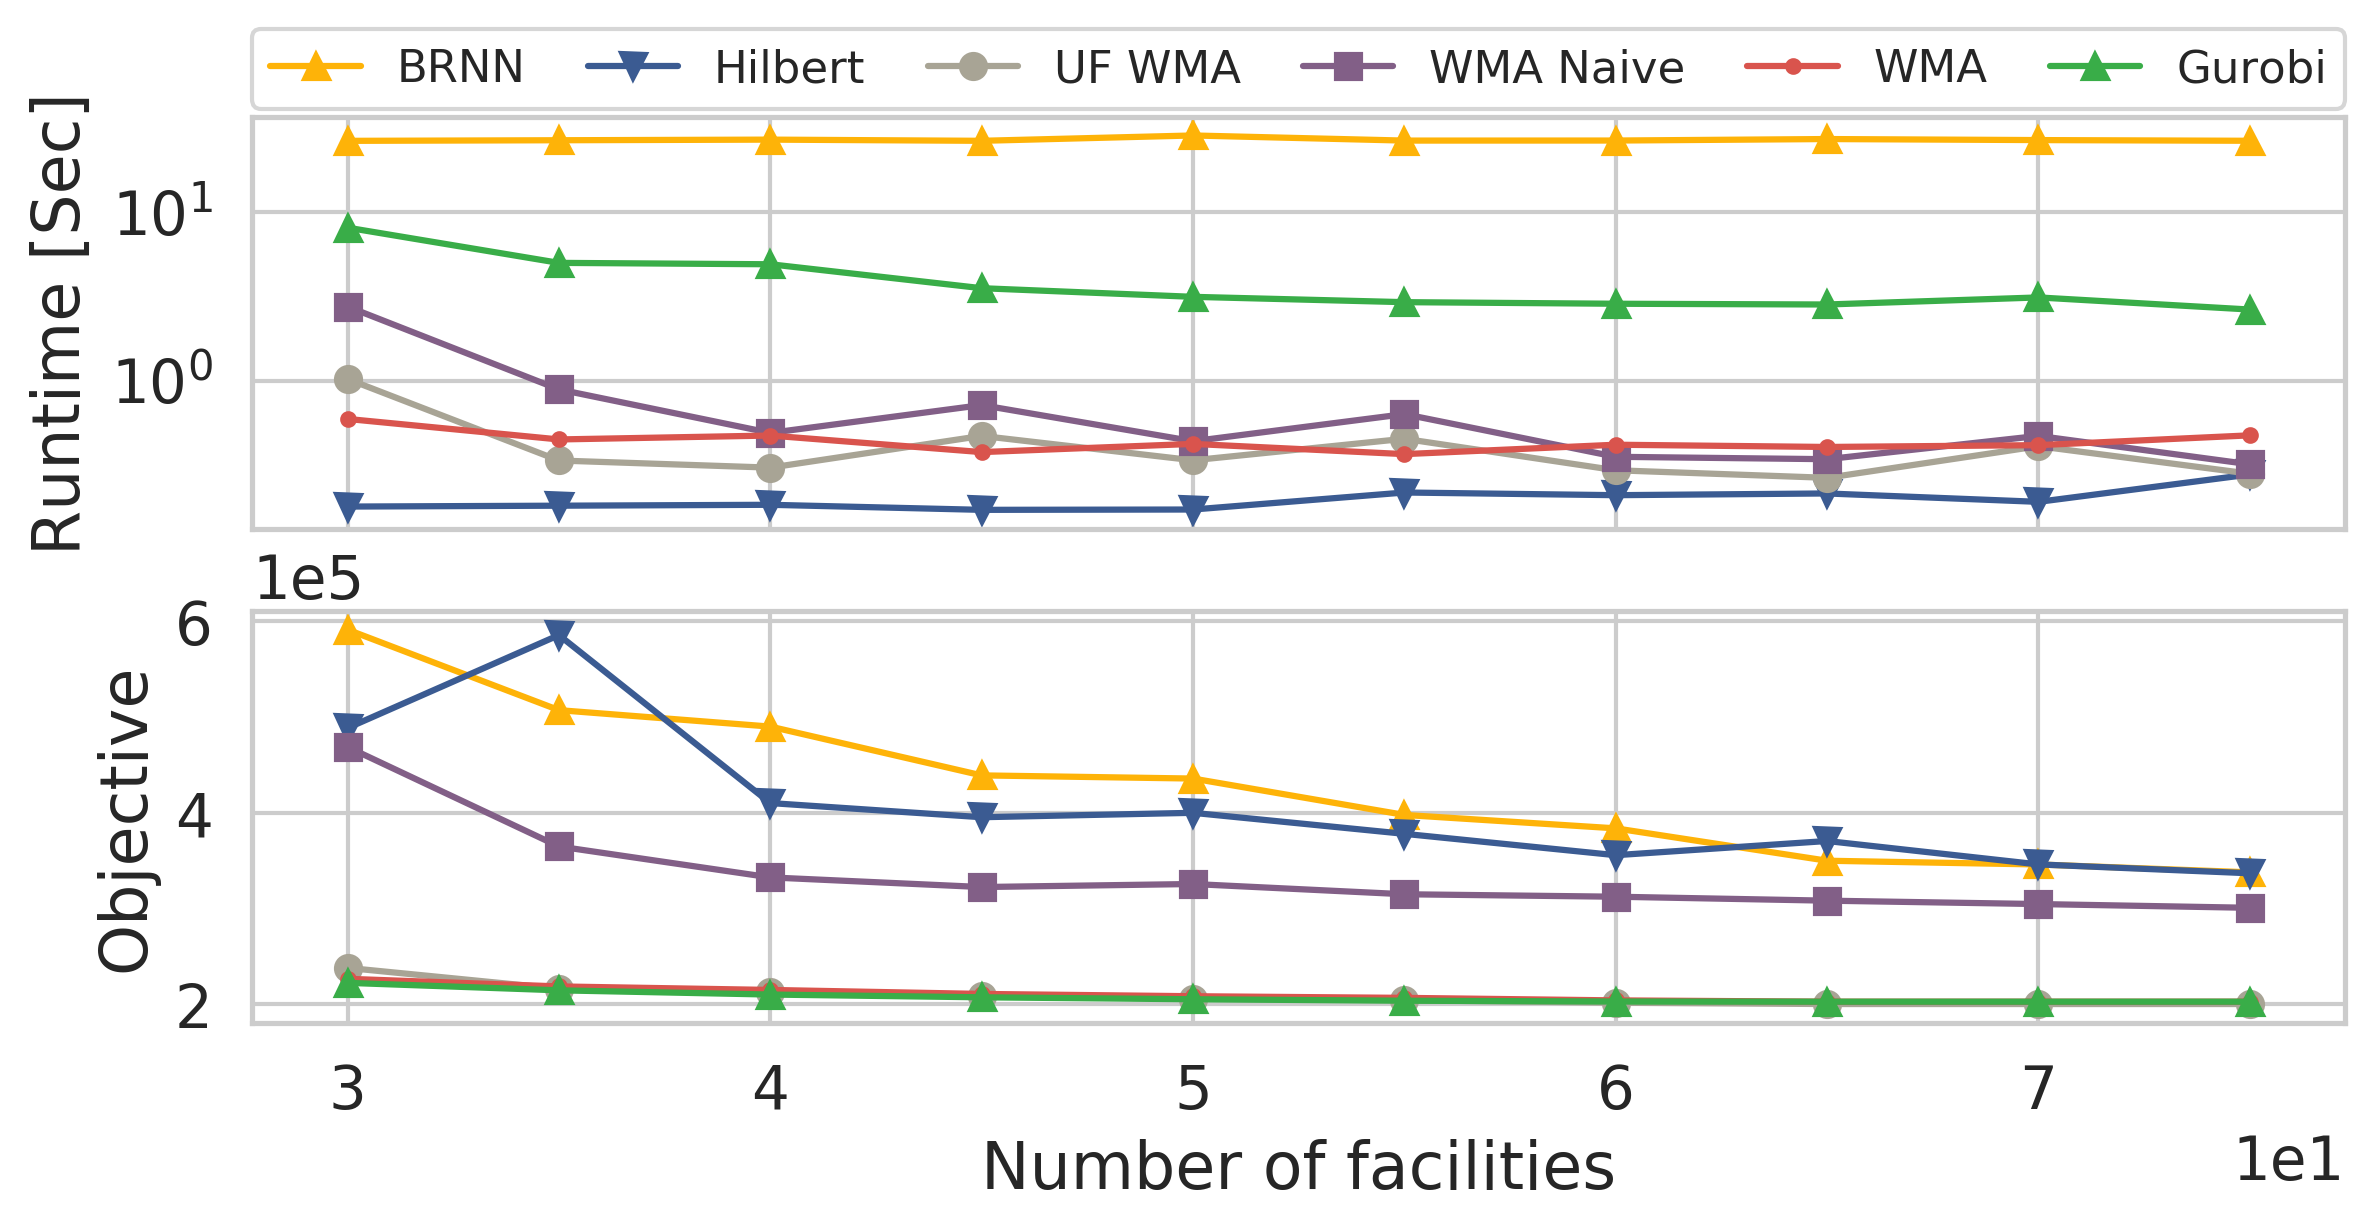

In [96]:
# expnames = [("brnn", "BRNN", sns.xkcd_rgb["amber"],'^'),
#             ("fcla_l0", "UF WMA", sns.xkcd_rgb["greyish"],'o'),
#             ("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'v'),
#              ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^'),
#              ("fcla_g_rand", "WMA Naive", sns.xkcd_rgb["dusty purple"],'s'),
#             ("fcla_multi", "WMA", sns.xkcd_rgb["pale red"],'.')]

# expnames = [("brnn", "BRNN", sns.xkcd_rgb["amber"],'D'),
#             ("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'o'),
#             ("fcla_g_rand", "WMA Naive", sns.xkcd_rgb["dusty purple"],'s'),
#             ("fcla_l0", "UF WMA", sns.xkcd_rgb["greyish"],'v'),
#             ("fcla_multi", "WMA", sns.xkcd_rgb["pale red"],'s'),
#             ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^')]

expnames = [("brnn", "BRNN", sns.xkcd_rgb["amber"],'^'),
            ("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'v'),
            ("fcla_l0", "UF WMA", sns.xkcd_rgb["greyish"],'o'),
             ("fcla_g_rand", "WMA Naive", sns.xkcd_rgb["dusty purple"],'s'),
                ("fcla_multi", "WMA", sns.xkcd_rgb["pale red"],'.'),
             ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^')]

plot_all('cph_multicap/all',"",False,sortby="number of facilities",xlabel="Number of facilities")

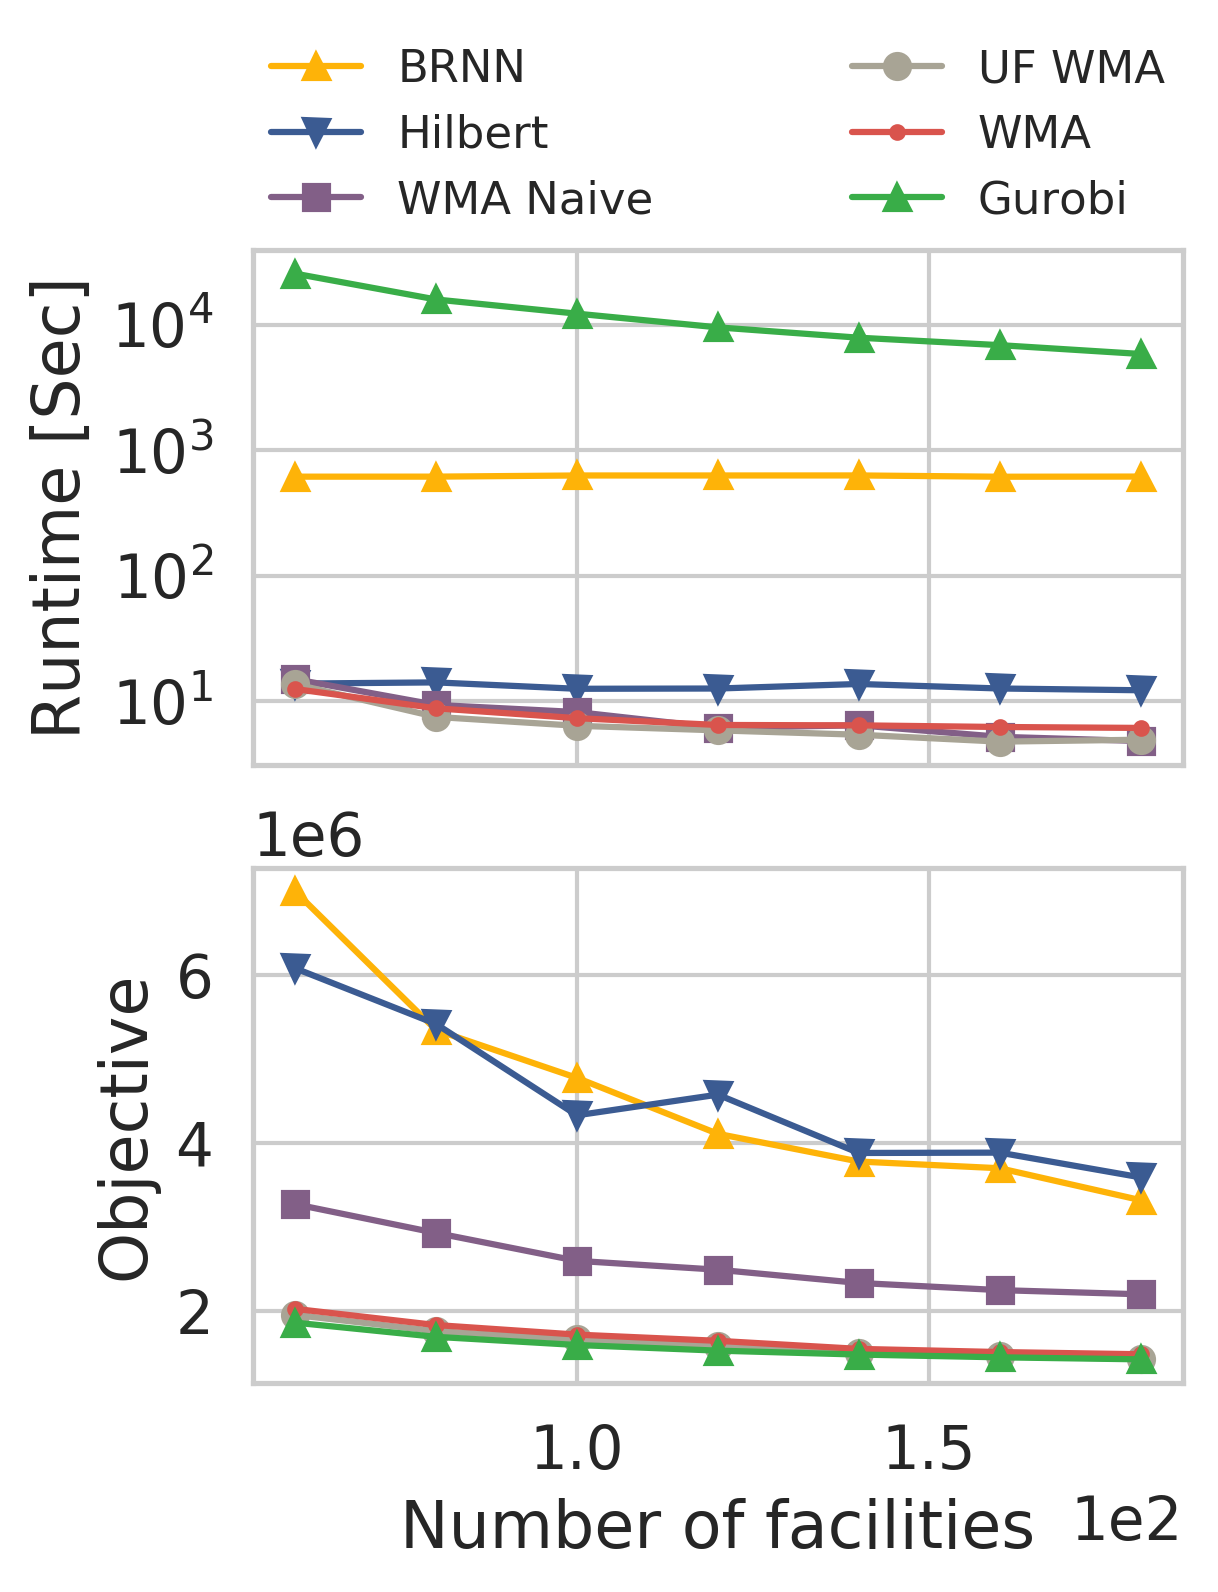

In [100]:
# expnames = [("fcla_l0_uni", "UF WMA", sns.xkcd_rgb["dusty purple"],'s'),
#             ("hilbert", "UF Hilbert", sns.xkcd_rgb["denim blue"],'v'),
#            ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^'),
#             ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'o')]

expnames = [("brnn", "BRNN", sns.xkcd_rgb["amber"],'^'),
            ("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'v'),
             ("fcla_g_rand", "WMA Naive", sns.xkcd_rgb["dusty purple"],'s'),
        ("fcla_l0_uni", "UF WMA", sns.xkcd_rgb["greyish"],'o'),
            ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'.'),
             ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^')]

plot_all('lvegas',"",False,sortby="number of facilities",xlabel="Number of facilities")

# Bike analysis

In [83]:
typedir = "real"

# expnames = [("fcla_l0", "UF WMA", sns.xkcd_rgb["greyish"],'o'),
#             ("hilbert", "UF Hilbert", sns.xkcd_rgb["denim blue"],'v'),
#              ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^'),
#              ("fcla_g_rand", "WMA Naive", sns.xkcd_rgb["dusty purple"],'s'),
#              ("brnn", "BRNN", sns.xkcd_rgb["amber"],'^'),
#             ("fcla_multi", "WMA", sns.xkcd_rgb["pale red"],'.')]

expnames = [("fcla_l0", "UF WMA", sns.xkcd_rgb["dusty purple"],'o','-'),
            ("fcla_multi", "WMA", sns.xkcd_rgb["pale red"],'.','--'),
            ("hilbert", "UF Hilbert", sns.xkcd_rgb["denim blue"],'v','-'),
             ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^','-')]#,

# expnames = [("fcla_l0", "UF WMA", sns.xkcd_rgb["dusty purple"],'o'),
#             ("fcla_multi", "WMA", sns.xkcd_rgb["pale red"],'s')]

def plot_all(dirname, expname, log=True, sortby="vcount",xlabel="Network size [Nodes]"):
    fontscale = 1.3
    sns.set(font_scale=fontscale,style="whitegrid")
    
    #load gurobi distance
#     f = open(os.path.join(data_path,typedir,dirname,'distMatrFull.txt'), "r")
#     distmatxtime = float(f.read())
#     f.close()
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(4, 4), dpi=300)
    
    for expname in expnames:
        results = load_results(os.path.join(data_path, typedir, dirname, "solutions", expname[0]), 
                               os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
        results = results[results['objective'].notnull()]
        
        if (expname[0] == 'fcla_l0'):
            results.set_value(results['number of facilities'] < 30, 'number of facilities', 30)
        results = results[results['number of facilities'] >= 30]
        
        runtime_results = results['runtime']
        if (re.match(r'gurobi',expname[0])):
            runtime_results += results['sptime']
#             runtime_results += distmatxtime
        
        ax1.plot(results[sortby], runtime_results, expname[2], label=expname[1], marker=expname[3], linestyle=expname[4])
        ax2.plot(results[sortby], results['objective'], expname[2], label=expname[1], marker=expname[3], linestyle=expname[4])
        
    # setting first axis
    ax1.set_yscale("log", nonposx='clip')
    if (log):
        ax1.set_xscale("log", nonposx='clip', basex=10)
        ax2.set_xscale("log", nonposx='clip', basex=10)
        
    ax1.set_ylabel("Runtime [Sec]")
    ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=2, mode="expand", borderaxespad=0.)
    plt.setp(ax1.get_xticklabels(), visible=False)
    # setting second axis
#     ax2.ticklabel_format(style='sci', axis='y')
#     ax2.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Objective")
    ax2.yaxis.get_major_formatter().set_powerlimits((0, 0))
    if (not log):
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        
    
#     ax1.set_xlim(20, 85)
#     ax2.set_xlim(20, 85)
#     ax2.set_ylim(1.5*10**5, 5.5*10**5)

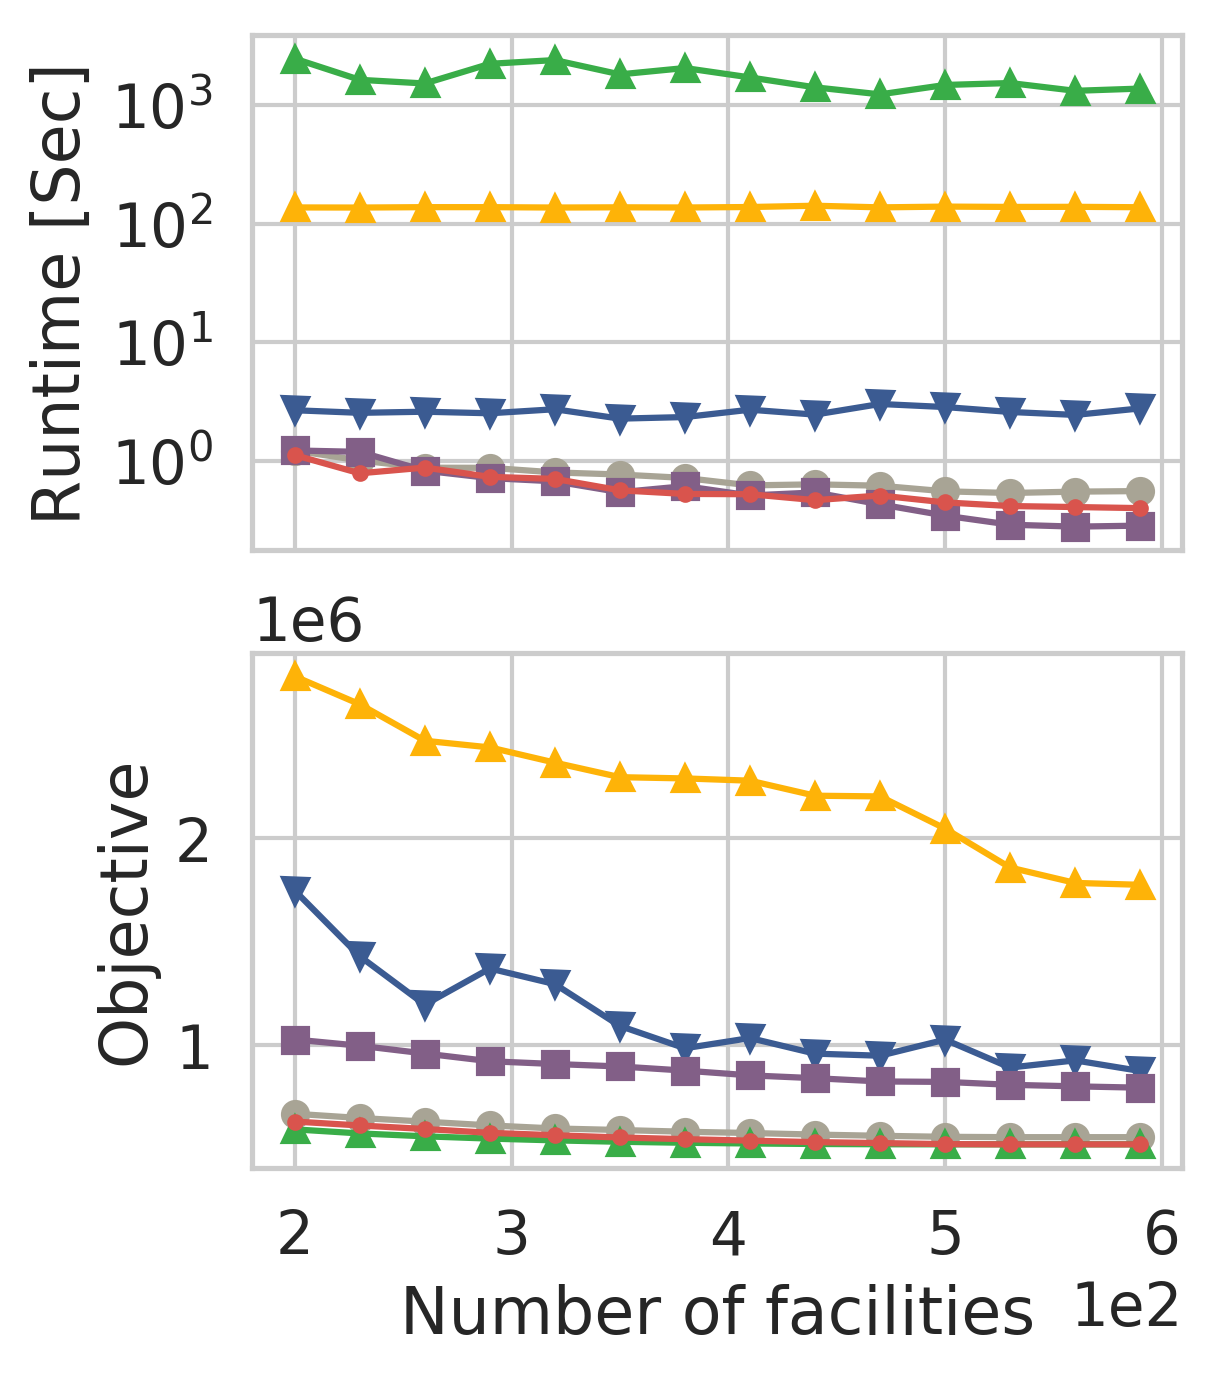

In [89]:
expnames = [("fcla_l0", "UF WMA", sns.xkcd_rgb["greyish"],'o'),
            ("hilbert", "UF Hilbert", sns.xkcd_rgb["denim blue"],'v'),
             ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^'),
             ("fcla_g_rand", "WMA Naive", sns.xkcd_rgb["dusty purple"],'s'),
             ("brnn", "BRNN", sns.xkcd_rgb["amber"],'^'),
            ("fcla_multi", "WMA", sns.xkcd_rgb["pale red"],'.')]
plot_all('cph_multicap/bikes',"",False,sortby="number of facilities",xlabel="Number of facilities")